In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Load Dataset and Dataset Information

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/research methodology /household_power_consumption.csv")

In [ ]:
dataset.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [ ]:
dataset.tail()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0
260639,260639,30/6/2007,23:59:00,2.548,0.354,239.25,10.6,0,1,17.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [ ]:
dataset.shape

(260640, 10)

Feature Engineering

In [ ]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
# by combining the two columns and converting to datetime format
dataset['date_time'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'])

# Convert the 'Global_active_power' column to numeric format
# and remove any rows with NaN values
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
dataset = dataset.dropna(subset=['Global_active_power'])

# Convert the 'date_time' column to datetime format
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

In [ ]:
# Create new columns for year, quarter, month, and day
dataset['year'] = dataset['date_time'].apply(lambda x: x.year)
dataset['quarter'] = dataset['date_time'].apply(lambda x: x.quarter)
dataset['month'] = dataset['date_time'].apply(lambda x: x.month)
dataset['day'] = dataset['date_time'].apply(lambda x: x.day)

In [ ]:
# Keep only the columns 'date_time', 'Global_active_power', 'year', 'quarter', 'month', 'day'
dataset = dataset.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [ ]:
# Sort the data by date_time in ascending order
dataset.sort_values('date_time', inplace=True, ascending=True)

In [ ]:
# Reset the index of the data
dataset = dataset.reset_index(drop=True)

In [ ]:
# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
dataset['weekday'] = dataset['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [ ]:
dataset.shape

(256869, 7)

In [ ]:
dataset.date_time.min()

Timestamp('2007-01-01 00:00:00')

In [ ]:
dataset.date_time.max()

Timestamp('2007-12-06 23:59:00')

In [ ]:
dataset.tail()

,date_time,Global_active_power,year,quarter,month,day,weekday
256864,2007-12-06 23:55:00,0.178,2007,4,12,6,1
256865,2007-12-06 23:56:00,0.178,2007,4,12,6,1
256866,2007-12-06 23:57:00,0.176,2007,4,12,6,1
256867,2007-12-06 23:58:00,0.216,2007,4,12,6,1
256868,2007-12-06 23:59:00,0.264,2007,4,12,6,1


Exploratory Data Analysis

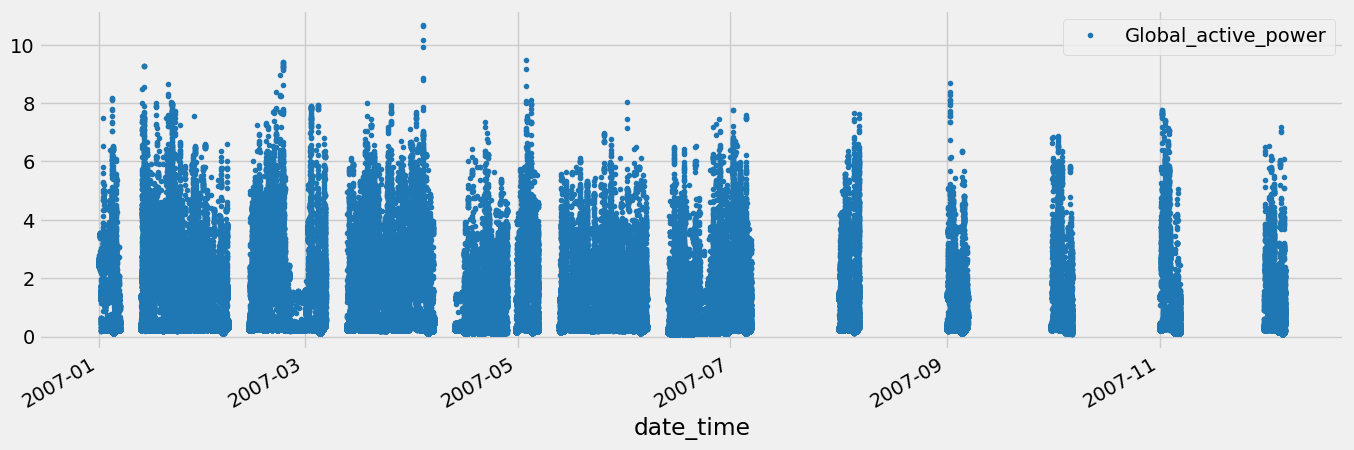

In [ ]:
dataset.plot(x='date_time', y='Global_active_power',style='.',
        figsize=(15, 5),
        color=color_pal[0])
plt.show()

In [ ]:
dataset.isna().sum()

date_time              0
Global_active_power    0
year                   0
quarter                0
month                  0
day                    0
weekday                0
dtype: int64

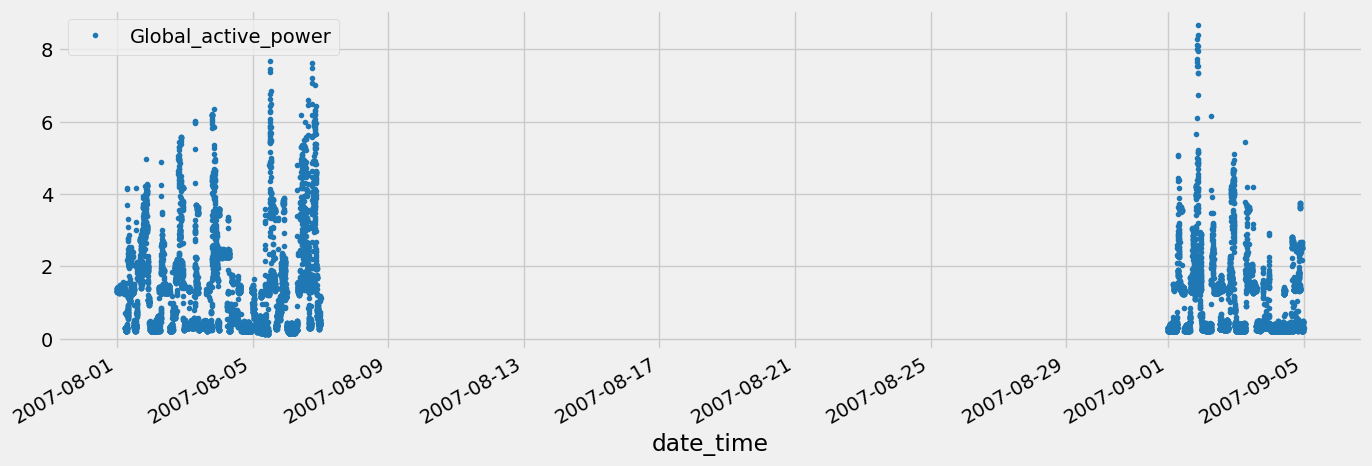

In [ ]:
no_value = dataset.loc[(dataset['date_time'] >= '2007-08-01') & (dataset['date_time'] < '2007-09-05')]

no_value.plot(x='date_time', y='Global_active_power',style='.',
        figsize=(15, 5),
        color=color_pal[0])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = dataset.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 50
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train.shape

(205444, 50)

In [ ]:
Y_train.shape

(205444,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='normal', activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Training the ANN model
history = model.fit(X_train, Y_train, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
6421/6421 [==============================] - 19s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335
Epoch 2/25
6421/6421 [==============================] - 18s 3ms/step - loss: 8.8296e-04 - root_mean_squared_error: 0.0297
Epoch 3/25
6421/6421 [==============================] - 19s 3ms/step - loss: 8.6589e-04 - root_mean_squared_error: 0.0294
Epoch 4/25
6421/6421 [==============================] - 19s 3ms/step - loss: 8.5146e-04 - root_mean_squared_error: 0.0292
Epoch 5/25
6421/6421 [==============================] - 18s 3ms/step - loss: 8.3868e-04 - root_mean_squared_error: 0.0290
Epoch 6/25
6421/6421 [==============================] - 18s 3ms/step - loss: 8.2502e-04 - root_mean_squared_error: 0.0287
Epoch 7/25
6421/6421 [==============================] - 17s 3ms/step - loss: 8.1575e-04 - root_mean_squared_error: 0.0286
Epoch 8/25
6421/6421 [==============================] - 16s 3ms/step - loss: 8.0951e-04 - root_mean_squared_error: 0.0285
Epoch 9/25
6421/6421 [======

In [ ]:
y_ann_pred1 = model.predict(X_test)

1604/1604 [==============================] - 3s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

rmse_ANN = mean_squared_error(Y_test, y_ann_pred1, squared=False)
mse = mean_squared_error(Y_test, y_ann_pred1)
mae = mean_absolute_error(Y_test, y_ann_pred1)
r2 = r2_score(Y_test, y_ann_pred1)

print(f'Test RMSE: {rmse_ANN}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f"Mean Absolute Error (MAE) : {mae}")

Test RMSE: 0.02732953242957592
Mean Squared Error (MSE): 0.0007469033007510006
R-squared (R2) Score: 0.9397843945328378
Mean Absolute Error (MAE) : 0.010976262390613556


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred_poly = poly_reg.predict(X_test)
rmse_polynom_test = mean_squared_error(Y_test, y_pred_poly, squared=False)
mse = mean_squared_error(Y_test, y_pred_poly)
mae = mean_absolute_error(Y_test, y_pred_poly)
r2 = r2_score(Y_test, y_pred_poly)

print(f'Test RMSE: {rmse_polynom_test}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f"Mean Absolute Error (MAE) : {mae}")

Test RMSE: 0.028113504871726036
Mean Squared Error (MSE): 0.0007903691730462015
R-squared (R2) Score: 0.9362801549286418
Mean Absolute Error (MAE) : 0.010896856896579266


In [ ]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=3000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.003,
                       random_state=42)

xg.fit(X_train, Y_train)

y_pred_xgb_test = xg.predict(X_test)

rmse_XGBOOST = mean_squared_error(Y_test, y_pred_xgb_test, squared=False)
mse = mean_squared_error(Y_test, y_pred_xgb_test)
mae = mean_absolute_error(Y_test, y_pred_xgb_test)
r2 = r2_score(Y_test, y_pred_xgb_test)

print(f'Test RMSE: {rmse_XGBOOST}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f"Mean Absolute Error (MAE) : {mae}")

Test RMSE: 0.027726728469133377
Mean Squared Error (MSE): 0.000768771511502564
R-squared (R2) Score: 0.9380213728712772
Mean Absolute Error (MAE) : 0.010240120813250542


In [ ]:
X_train_xgb = xg.predict(X_train).reshape(-1, 1)
X_test_xgb = xg.predict(X_test).reshape(-1, 1)

In [ ]:
X_train_combined = np.concatenate((X_train, X_train_xgb), axis=1)
X_test_combined = np.concatenate((X_test, X_test_xgb), axis=1)

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential()
model.add(Dense(units=64, input_dim=X_train_combined.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='normal', activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Training the ANN model
history = model.fit(X_train_combined, Y_train, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
6421/6421 [==============================] - 16s 2ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318
Epoch 2/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.5085e-04 - root_mean_squared_error: 0.0292
Epoch 3/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.3872e-04 - root_mean_squared_error: 0.0290
Epoch 4/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.2402e-04 - root_mean_squared_error: 0.0287
Epoch 5/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.1295e-04 - root_mean_squared_error: 0.0285
Epoch 6/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.0768e-04 - root_mean_squared_error: 0.0284
Epoch 7/25
6421/6421 [==============================] - 15s 2ms/step - loss: 8.0096e-04 - root_mean_squared_error: 0.0283
Epoch 8/25
6421/6421 [==============================] - 16s 2ms/step - loss: 7.9266e-04 - root_mean_squared_error: 0.0282
Epoch 9/25
6421/6421 [======

In [ ]:
y_ann_pred = model.predict(X_test_combined)

1604/1604 [==============================] - 4s 2ms/step


In [ ]:
rmse_ANN = mean_squared_error(Y_test, y_ann_pred, squared=False)
mse = mean_squared_error(Y_test, y_ann_pred)
mae = mean_absolute_error(Y_test, y_ann_pred)
r2 = r2_score(Y_test, y_ann_pred)

print(f'Test RMSE: {rmse_ANN}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f"Mean Absolute Error (MAE) : {mae}")

Test RMSE: 0.02723797969520092
Mean Squared Error (MSE): 0.0007419075700454414
R-squared (R2) Score: 0.9401871475595117
Mean Absolute Error (MAE) : 0.010585014708340168


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=30, batch_size=1240, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

In [ ]:
from tensorflow.keras.models import Model

# Assuming 'model' is your existing Keras model
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

# Extract features from training and test sets
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

In [ ]:
import xgboost as xgb

# Initialize XGBRegressor with your chosen hyperparameters
model_xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                                 n_estimators=3000,
                                 objective='reg:squarederror',
                                 max_depth=3,
                                 learning_rate=0.003,
                                 random_state=42)

# Fit XGBRegressor on the extracted features
model_xgb_reg.fit(X_train_features, Y_train)

In [ ]:
# Make predictions on the test set
y_pred = model_xgb_reg.predict(X_test_features)

# Evaluate the performance (optional)
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(Y_test, y_pred, squared=False)
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"RMSE : {rmse}")
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2) Score: {r2}')
print(f"Mean Absolute Error (MAE) : {mae}")